# Installing the libraries

In [1]:
# !pip install opencv-python
# !pip uninstall tensorflow
# !pip install keras

# Importing all the libraries

In [2]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [10]:
# data_dir = '/content/Flower Classification.ipynb'
data_dir = "/content/Flower Classification.ipynb"

In [11]:
categories = ["Daisy","Dandelion","Rose","Sunflower","Tulip"]

In [12]:
data = []
def make_data():
    for category in categories:
        path = os.path.join(data_dir,category)
        label = categories.index(category)
        print(category + "--" + str(label))
        for img_name in os.listdir(path):
            img_path = os.path.join(path,img_name)
            image = cv2.imread(img_path)
            try:
                image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image = cv2.resize(image,(224,224))
                image = np.array(image,dtype=np.float32)
                data.append([image,label])

            except Exception as e:
                pass
    print(len(data))
    pik = open("data.pickle","wb")
    pickle.dump(data,pik)
    pik.close()
make_data()

Daisy--0


NotADirectoryError: ignored

In [ ]:
def load_data():
    pick  = open("data.pickle","rb")
    data = pickle.load(pick)
    pick.close()
    
    np.random.shuffle(data)
    feature = []
    labels = []
    
    for img , label in data:
        feature.append(img)
        labels.append(label)

    # le=LabelEncoder()
    # labels = le.fit_transform(labels)
    # labels=to_categorical(labels,5)
    
    feature = np.array(feature, dtype=np.float32)
    labels = np.array(labels)

    feature = feature/255.0

    return [feature, labels]
    

In [ ]:
# import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
feature,labels = load_data()

In [ ]:
labels

array([0, 1, 4, ..., 1, 1, 2])

In [ ]:
print(feature.shape)

(4327, 224, 224, 3)


In [ ]:
import random as rn

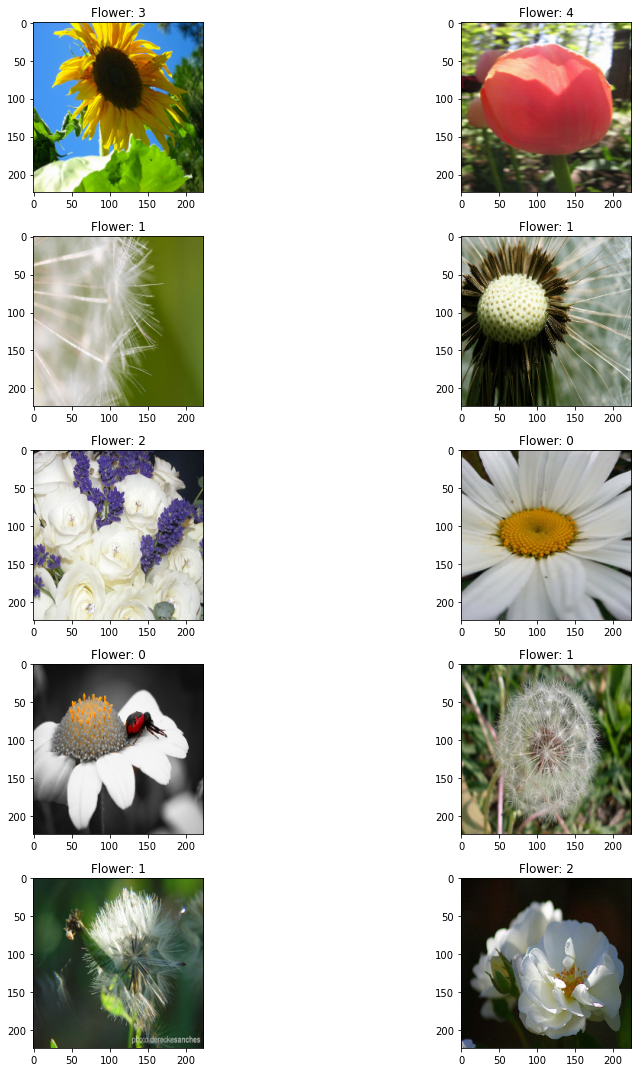

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(labels))
        ax[i,j].imshow(feature[l])
        ax[i,j].set_title('Flower: '+str(labels[l]))
        
plt.tight_layout()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(feature,labels,test_size = 0.25,random_state = 42)

In [ ]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Conv2D,MaxPooling2D, Dropout,Flatten, Dense, Activation,BatchNormalization

In [ ]:
tf.random.set_seed(
  np.random.seed(42)
)

In [ ]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(224,224,3), padding="Same", activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding="Same", activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(96, (3, 3), padding="Same", activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding="Same", activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

#     model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(5, activation='sigmoid'))

    model.add(Flatten())

    return model

In [ ]:
batch_size=128
epochs=15

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

# from keras import callbacks
# earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
#                                         mode ="min", patience = 5,
#                                         verbose=1,
#                                         restore_best_weights = True)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model = create_model()

model.compile(loss='binary_crossentropy',
             optimizer='RMSProp',
             metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_25 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_26 (Batc (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 56, 56, 64)       

In [ ]:
# History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),epochs = epochs, validation_data = (x_test,y_test),verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
History = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/15
26/26 [==============================] - 458s 18s/step - loss: -0.5495 - accuracy: 0.0025 - val_loss: 1.0948 - val_accuracy: 0.0360
Epoch 2/15
26/26 [==============================] - 443s 17s/step - loss: -3.6817 - accuracy: 9.2450e-04 - val_loss: -0.4599 - val_accuracy: 9.2421e-04
Epoch 3/15
26/26 [==============================] - 447s 17s/step - loss: -6.7083 - accuracy: 0.0139 - val_loss: -2.0913 - val_accuracy: 0.0046
Epoch 4/15
26/26 [==============================] - 446s 17s/step - loss: -9.6584 - accuracy: 0.0324 - val_loss: -2.9199 - val_accuracy: 0.0018
Epoch 5/15
26/26 [==============================] - 444s 17s/step - loss: -11.5414 - accuracy: 0.0589 - val_loss: -6.8211 - val_accuracy: 0.0065
Epoch 6/15
26/26 [==============================] - 456s 18s/step - loss: -12.8574 - accuracy: 0.0851 - val_loss: -13.3676 - val_accuracy: 0.1932
Epoch 7/15
26/26 [==============================] - 456s 18s/step - loss: -13.8513 - accuracy: 0.0952 - val_loss: -5.0772 - va

In [ ]:
# History2 = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),epochs = epochs, validation_data = (x_test,y_test),verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# History2 = model.fit(x_train,y_train,epochs=10,batch_size=batch_size,validation_data = (x_test,y_test),callbacks =[earlystopping])

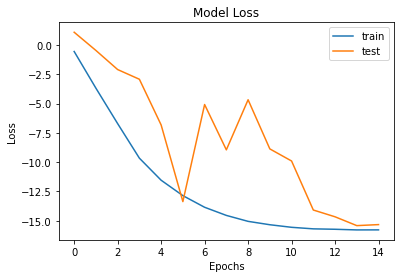

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

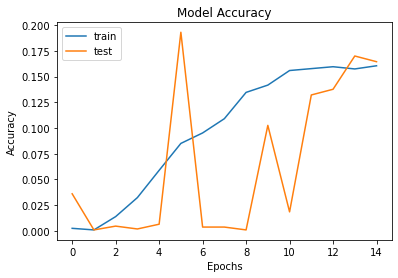

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [ ]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
        
print(len(prop_class))
print(len(mis_class))

1025
57


In [ ]:
model.save("Flowers.h5")
model.save("Flowers.pkl")

INFO:tensorflow:Assets written to: Flowers.pkl\assets


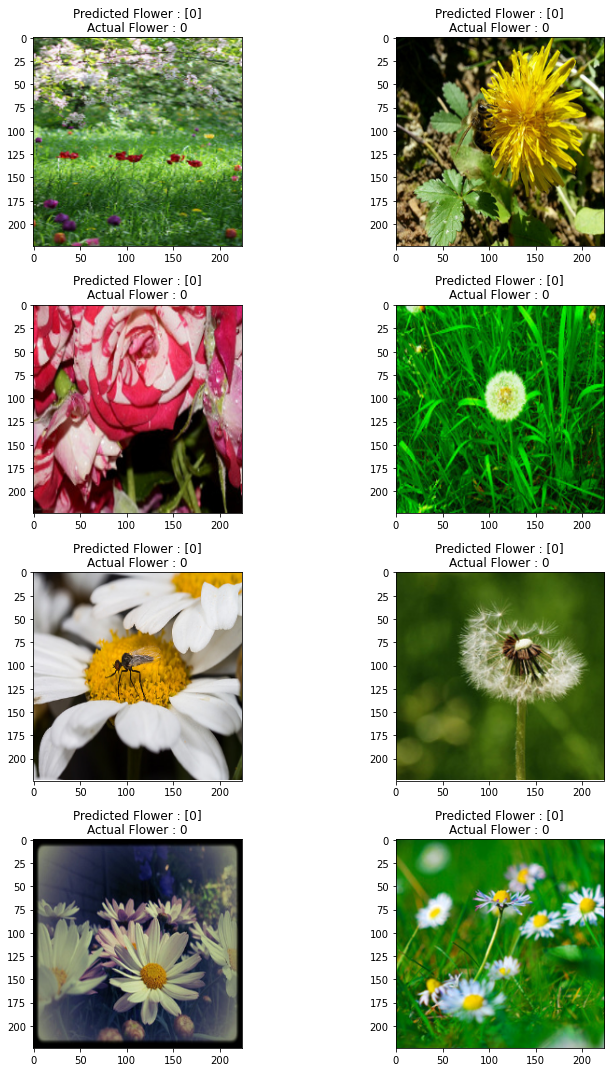

In [ ]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str([pred_digits[prop_class[count]]])+"\n"+"Actual Flower : "+ str(np.argmax([y_test[prop_class[count]]])))
        plt.tight_layout()
        count+=1

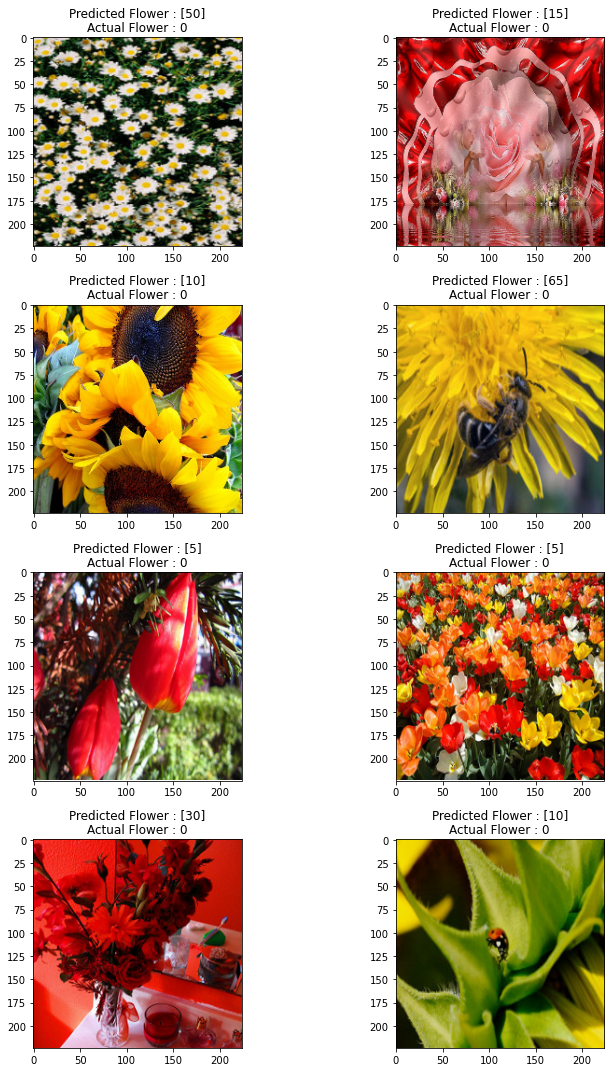

In [ ]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str([pred_digits[mis_class[count]]])+"\n"+"Actual Flower : "+str(np.argmax([y_test[mis_class[count]]])))
        plt.tight_layout()
        count+=1

In [ ]:
# pred=np.argmax(pred)
# y_test=np.argmax(y_test)